<h2 style="text-align:center;">DETECTING BOT-CONTROLLED ACCOUNTS ON SOCIAL MEDIA USING MACHINE LEARNING TECHNIQUES</h2>

### 1. Import Data Manipulation Libraries

In [2]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action="ignore")

### 2. Import Datasets

In [3]:
# Genuine Account CSV files
genuine_accounts_tweets_path = '/kaggle/input/twitter-bot-data/datasets_full.csv/genuine_accounts.csv/genuine_accounts.csv/tweets.csv'
genuine_accounts_users_path = '/kaggle/input/twitter-bot-data/datasets_full.csv/genuine_accounts.csv/genuine_accounts.csv/users.csv'


# Spam Bot Account CSV files
spam_accounts_tweets_path_1 = '/kaggle/input/twitter-bot-data/datasets_full.csv/social_spambots_1.csv/social_spambots_1.csv/tweets.csv'
spam_accounts_users_path_1 = '/kaggle/input/twitter-bot-data/datasets_full.csv/social_spambots_1.csv/social_spambots_1.csv/users.csv'

spam_accounts_tweets_path_2 = '/kaggle/input/twitter-bot-data/datasets_full.csv/social_spambots_2.csv/social_spambots_2.csv/tweets.csv'
spam_accounts_users_path_2 = '/kaggle/input/twitter-bot-data/datasets_full.csv/social_spambots_2.csv/social_spambots_2.csv/users.csv'

spam_accounts_tweets_path_3 = '/kaggle/input/twitter-bot-data/datasets_full.csv/social_spambots_3.csv/social_spambots_3.csv/tweets.csv'
spam_accounts_users_path_3 = '/kaggle/input/twitter-bot-data/datasets_full.csv/social_spambots_3.csv/social_spambots_3.csv/users.csv'

In [4]:
twitter_genuine_tweets = pd.read_csv(genuine_accounts_tweets_path, encoding="latin-1", low_memory=False)
twitter_genuine_users = pd.read_csv(genuine_accounts_users_path, encoding="latin-1", low_memory=False)

twitter_spam_tweets_1 = pd.read_csv(spam_accounts_tweets_path_1, encoding="latin-1", low_memory=False)
twitter_spam_users_1 = pd.read_csv(spam_accounts_users_path_1, encoding="latin-1", low_memory=False)

twitter_spam_tweets_2 = pd.read_csv(spam_accounts_tweets_path_2, encoding="latin-1", low_memory=False)
twitter_spam_users_2 = pd.read_csv(spam_accounts_users_path_2, encoding="latin-1", low_memory=False)

twitter_spam_tweets_3 = pd.read_csv(spam_accounts_tweets_path_3, encoding="latin-1", low_memory=False)
twitter_spam_users_3 = pd.read_csv(spam_accounts_users_path_3, encoding="latin-1", low_memory=False)

### 3. Dataset Preview

In [5]:
twitter_genuine_tweets.head(2)

,id,text,source,user_id,truncated,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,retweeted_status_id,geo,...,favorited,retweeted,possibly_sensitive,num_hashtags,num_urls,num_mentions,created_at,timestamp,crawled_at,updated
0,593932392663912449,RT @morningJewshow: Speaking about Jews and co...,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",678033.0,NaN,0.0,0.0,NaN,5.939322e+17,NaN,...,NaN,NaN,NaN,0.0,0.0,1.0,Fri May 01 00:18:11 +0000 2015,2015-05-01 02:18:11,2015-05-01 12:57:19,2015-05-01 12:57:19
1,593895316719423488,This age/face recognition thing..no reason pla...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",678033.0,NaN,0.0,0.0,NaN,0.000000e+00,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,Thu Apr 30 21:50:52 +0000 2015,2015-04-30 23:50:52,2015-05-01 12:57:19,2015-05-01 12:57:19


In [6]:
twitter_spam_tweets_1.head(2)

,id,text,source,user_id,truncated,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,retweeted_status_id,geo,...,favorited,retweeted,possibly_sensitive,num_hashtags,num_urls,num_mentions,created_at,timestamp,crawled_at,updated
0,532627591686275072,I Pooh - In silenzio 1968 http://t.co/ahvQxUqTws,"<a href=""http://www.facebook.com/twitter"" rel=...",24858289,NaN,0,0,NaN,0,NaN,...,NaN,NaN,NaN,0,1,0,Wed Nov 12 20:14:48 +0000 2014,2014-11-12 21:14:48,2014-11-12 21:44:09,2014-11-12 21:44:09
1,532624255058706432,http://t.co/HyI5EQKz6Q,"<a href=""http://www.facebook.com/twitter"" rel=...",24858289,NaN,0,0,NaN,0,NaN,...,NaN,NaN,NaN,0,1,0,Wed Nov 12 20:01:32 +0000 2014,2014-11-12 21:01:32,2014-11-12 21:44:09,2014-11-12 21:44:09


In [7]:
print(twitter_genuine_tweets.columns, end='\n\n')

Index(['id', 'text', 'source', 'user_id', 'truncated', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'in_reply_to_screen_name', 'retweeted_status_id',
       'geo', 'place', 'contributors', 'retweet_count', 'reply_count',
       'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive',
       'num_hashtags', 'num_urls', 'num_mentions', 'created_at', 'timestamp',
       'crawled_at', 'updated'],
      dtype='object')



In [8]:
print(twitter_genuine_users.columns, end='\n\n')

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'url', 'lang',
       'time_zone', 'location', 'default_profile', 'default_profile_image',
       'geo_enabled', 'profile_image_url', 'profile_banner_url',
       'profile_use_background_image', 'profile_background_image_url_https',
       'profile_text_color', 'profile_image_url_https',
       'profile_sidebar_border_color', 'profile_background_tile',
       'profile_sidebar_fill_color', 'profile_background_image_url',
       'profile_background_color', 'profile_link_color', 'utc_offset',
       'is_translator', 'follow_request_sent', 'protected', 'verified',
       'notifications', 'description', 'contributors_enabled', 'following',
       'created_at', 'timestamp', 'crawled_at', 'updated', 'test_set_1',
       'test_set_2'],
      dtype='object')



In [9]:
print(twitter_spam_tweets_1.columns, end='\n\n')

Index(['id', 'text', 'source', 'user_id', 'truncated', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'in_reply_to_screen_name', 'retweeted_status_id',
       'geo', 'place', 'contributors', 'retweet_count', 'reply_count',
       'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive',
       'num_hashtags', 'num_urls', 'num_mentions', 'created_at', 'timestamp',
       'crawled_at', 'updated'],
      dtype='object')



In [10]:
print(twitter_spam_users_1.columns, end='\n\n')

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'url', 'lang',
       'time_zone', 'location', 'default_profile', 'default_profile_image',
       'geo_enabled', 'profile_image_url', 'profile_banner_url',
       'profile_use_background_image', 'profile_background_image_url_https',
       'profile_text_color', 'profile_image_url_https',
       'profile_sidebar_border_color', 'profile_background_tile',
       'profile_sidebar_fill_color', 'profile_background_image_url',
       'profile_background_color', 'profile_link_color', 'utc_offset',
       'is_translator', 'follow_request_sent', 'protected', 'verified',
       'notifications', 'description', 'contributors_enabled', 'following',
       'created_at', 'timestamp', 'crawled_at', 'updated', 'test_set_1'],
      dtype='object')



### 4. Data Cleaning

#### 4.1. Add label column

In [11]:
twitter_genuine_users['label'] = 0

In [12]:
twitter_spam_users_1['label'] = 1
twitter_spam_users_2['label'] = 1
twitter_spam_users_3['label'] = 1

#### 4.2. Merge Dataframes

In [13]:
# Drop test_set_1 and test_set_2 to ensure column consistency across datasets
twitter_genuine_users.drop(columns=['test_set_1', 'test_set_2'], axis=1, inplace=True)
twitter_spam_users_1.drop(columns=['test_set_1'], axis=1, inplace=True)
twitter_spam_users_3.drop(columns=['test_set_2'], axis=1, inplace=True)

In [14]:
# Merge dataframes
tweets_df = pd.concat([twitter_genuine_tweets, twitter_spam_tweets_1, twitter_spam_tweets_2, twitter_spam_tweets_3])
users_df = pd.concat([twitter_genuine_users, twitter_spam_users_1, twitter_spam_users_2, twitter_spam_users_3])

In [15]:
# Check resulting size of dataframe
print(f"The resulting size of the users dataset is {tweets_df.shape[0]}")
print(f"The resulting size of the tweets dataset is {users_df.shape[0]}")

The resulting size of the users dataset is 6296495
The resulting size of the tweets dataset is 8386


#### 4.3. Check for missing values

In [16]:
from tabulate import tabulate

In [17]:
# Collect information in a list of dictionaries
info_list = []
for column_name, column_data in tweets_df.items():
    dtype = column_data.dtype
    num_nans = column_data.isna().sum()
    info_list.append({'Column Name': column_name, 'Datatype': dtype, 'Number of NaNs': num_nans})

# Print the information in a table
print(tabulate(info_list, headers='keys', tablefmt='pretty'))

+-------------------------+----------+----------------+
|       Column Name       | Datatype | Number of NaNs |
+-------------------------+----------+----------------+
|           id            |  object  |       0        |
|          text           |  object  |     12987      |
|         source          |  object  |       73       |
|         user_id         | float64  |       1        |
|        truncated        | float64  |    6296495     |
|  in_reply_to_status_id  | float64  |       1        |
|   in_reply_to_user_id   | float64  |       1        |
| in_reply_to_screen_name |  object  |    5295806     |
|   retweeted_status_id   | float64  |       1        |
|           geo           | float64  |    6296495     |
|          place          |  object  |    6169527     |
|      contributors       | float64  |    6296495     |
|      retweet_count      | float64  |       1        |
|       reply_count       | float64  |       1        |
|     favorite_count      | float64  |       1  

#### 4.4. Drop Columns with too many NaNs

In [18]:
nan_columns = [
    'truncated', 'in_reply_to_screen_name', 'geo', 'place', 
    'contributors', 'favorited', 'retweeted', 'possibly_sensitive'
]

In [19]:
tweets_df = tweets_df.drop(columns=nan_columns)

### 5. Feature Engineering

In [20]:
from dateutil.parser import parse

#### 5.1. Define some utility functions

In [21]:
def convert_timestamp(timestamp):
    """
    Convert a timestamp to seconds since the Unix epoch.

    Parameters:
    - timestamp (str): A timestamp in either datetime string format or milliseconds.

    Returns:
    - float: The converted timestamp in seconds.

    The function attempts to parse the input timestamp. If successful, it calculates
    the timestamp in seconds since the Unix epoch using the `timestamp()` method.
    If parsing fails, it assumes the timestamp is in milliseconds and converts it to
    seconds by dividing by 1000.
    """
    converted_timestamp = 0  # Initialize the variable to store the converted timestamp

    try:
        # Try to parse the timestamp as a datetime string and get the timestamp in seconds
        converted_timestamp = parse(timestamp).timestamp()
    except:
        # If parsing fails, assume it's in milliseconds and convert to seconds
        converted_timestamp = int(timestamp[:-1]) / 1000

    return converted_timestamp

In [22]:
print(parse("Tue Jun 11 11:20:35 +0000 2013"))

print(parse("Tue Jun 11 11:20:35 +0000 2013").timestamp())

2013-06-11 11:20:35+00:00
1370949635.0


In [23]:
example_timestamp = str(users_df['created_at'].values[0])
print(example_timestamp)

convert_timestamp(str(users_df['created_at'].values[0]))

Tue Jun 11 11:20:35 +0000 2013


1370949635.0

In [24]:
def get_intertime(df):
    """
    Calculate the average time difference between consecutive tweets.

    Parameters:
    - df (pandas.DataFrame): A DataFrame containing tweet information.
    
    Returns:
    - float: The average time difference between consecutive tweets in seconds.

    This function takes a DataFrame with a 'created_at' column representing
    the timestamp of each tweet. It calculates the time difference between
    consecutive tweets, sorts the differences, and returns the average time
    difference. If there are no tweets or only one tweet, it returns 0.

    Note: Make sure the 'created_at' column is in a format that can be
    converted to timestamps using the convert_timestamp function.
    """
    tweet_timestamps = []

    for index, row in df.iterrows():
        tweet_timestamps.append(convert_timestamp(str(row["created_at"])))

    tweet_timestamps.sort()
    tts_diff = np.diff(np.array(tweet_timestamps))
    
    return sum(tts_diff) / (len(tts_diff) if len(tts_diff) != 0 else 1)

#### 5.2. Extract Features

In [25]:
# Initialize an empty DataFrame with column names
columns = ["user_id", "retweets", "replies", "favoriteC", "hashtag", "url",
           "mentions", "intertime", "ffratio", "tweets"]

In [26]:
user_features_df = pd.DataFrame(columns=columns)

# Iterate over rows in users_df
for index, row in users_df.iterrows():
    usr = row['id']
    usr_tweets_df = tweets_df.loc[tweets_df["user_id"] == usr]
    tweet_count = len(usr_tweets_df) if len(usr_tweets_df) != 0 else 1

    retweets = len(usr_tweets_df[usr_tweets_df.retweeted_status_id != 0]) / tweet_count
    replies = len(usr_tweets_df[usr_tweets_df.in_reply_to_status_id != 0]) / tweet_count
    favoriteC = row["favourites_count"] / tweet_count
    hashtag = sum(usr_tweets_df["num_hashtags"].values.tolist()) / tweet_count
    url = sum(usr_tweets_df["num_urls"].values.tolist()) / tweet_count
    mentions = sum(usr_tweets_df["num_mentions"].values.tolist()) / tweet_count
    intertime = get_intertime(usr_tweets_df)
    ffratio = row["friends_count"] / (row["followers_count"] if row["followers_count"] != 0 else 1)
    uniqueHashtags = -1
    uniqueMentions = -1
    uniqueURL = -1
    
    # Extract users tweets
    tweets = usr_tweets_df['text'].values
    tweets = ' '.join([str(tweet) for index, tweet in enumerate(tweets) if index <= 10])
    # Return "Nil" for users with no tweets
    tweets = "Nil" if not tweets else tweets
    
    # Create a list with user features
    usr_features = [usr, retweets, replies, favoriteC, hashtag, url, mentions,
                    intertime, ffratio, tweets]

    # Append the user features to the DataFrame
    user_features_df = pd.concat([user_features_df, pd.DataFrame([usr_features], columns=columns)])

#     if index == 10:
#         break
        
user_features_df = user_features_df.reset_index().drop(columns=['index'])

#### 5.3. Add engineered features to base features

In [27]:
base_columns = [
    'id', 'statuses_count', 'followers_count', 'friends_count', 
    'favourites_count', 'listed_count', 'label'
]

base_df = users_df[base_columns]

In [28]:
twitter_df = pd.merge(user_features_df, base_df, how='inner', left_on='user_id', right_on='id')

twitter_df = twitter_df.drop(columns=['id'])

twitter_df.head()

,user_id,retweets,replies,favoriteC,hashtag,url,mentions,intertime,ffratio,tweets,statuses_count,followers_count,friends_count,favourites_count,listed_count,label
0,1502026416,0.00000,0.000000,265.00000,0.000000,0.000000,0.000000,0.000000,1.596154,Nil,2177,208,332,265,1,0
1,2492782375,0.00000,0.000000,3972.00000,0.000000,0.000000,0.000000,0.000000,1.469697,Nil,2660,330,485,3972,5,0
2,293212315,0.00000,0.000000,1185.00000,0.000000,0.000000,0.000000,0.000000,1.066265,Nil,1254,166,177,1185,0,0
3,191839658,0.33913,0.276708,18.72795,0.147516,0.097516,0.825776,534.917366,0.436388,RT @steviebuckys: do i look aesthetic yet http...,202968,2248,981,60304,101,0
4,3020965143,0.00000,0.000000,5.00000,0.000000,0.000000,0.000000,0.000000,3.761905,Nil,82,21,79,5,0,0


#### 5.4. Save Engineered Dataset

In [29]:
twitter_df.to_csv("twitter_df_engineered.csv", index=False)

#### 5.5. Load Engineered Dataset

In [30]:
import numpy as np
import pandas as pd

In [31]:
twitter_df = pd.read_csv("/kaggle/working/twitter_df_engineered.csv")

### 6. Data Visualization

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

#### 6.1. Visualize the proportion of data class

In [33]:
labels_count = twitter_df['label'].value_counts()

labels_count

label
1    4912
0    3474
Name: count, dtype: int64

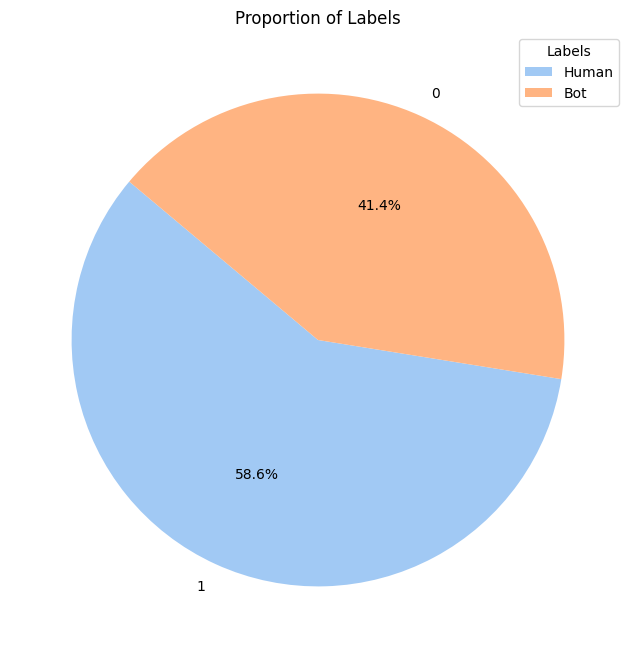

In [34]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
sns.set_palette("pastel")
plt.pie(labels_count, labels=labels_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Labels')
plt.legend(labels=['Human', 'Bot'], title='Labels', loc='upper right')
plt.show()

#### 6.2. Visualize tweet wordcloud

In [35]:
from wordcloud import WordCloud

In [36]:
def wordcloud(tweet):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tweet)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

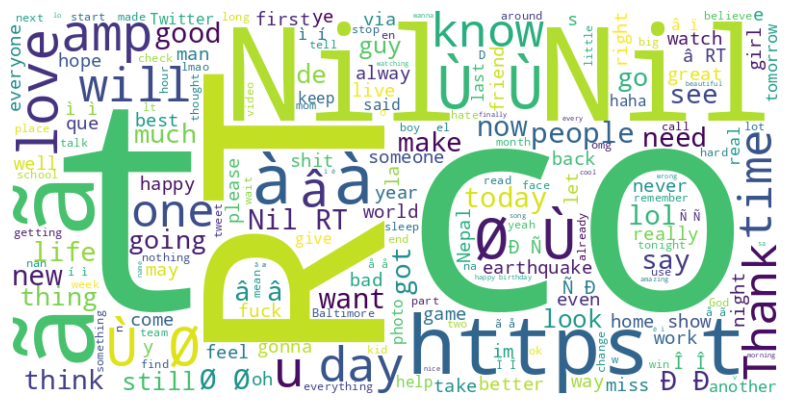

In [37]:
genuine = ' '.join(twitter_df[twitter_df['label'] == 0]['tweets'])

wordcloud(genuine)

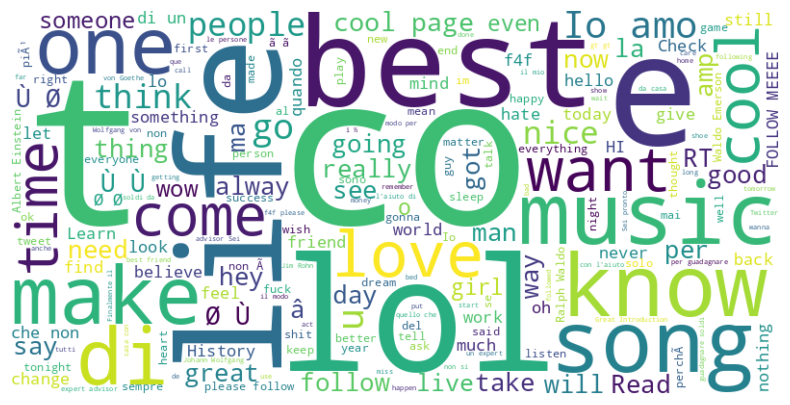

In [38]:
spam = ' '.join(twitter_df[twitter_df['label'] == 1]['tweets'])

wordcloud(spam)

### 7. Data Preprocessing

#### 7.1. Drop id column

In [39]:
twitter_df = twitter_df.drop(columns=['user_id'], axis=1)

#### 7.2. Separate features from target

In [40]:
features_df = twitter_df.drop(columns=['label'])

target = twitter_df['label']

#### 7.3. Numeric columns scaling

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
# Features before scaling
features_df.describe()

,retweets,replies,favoriteC,hashtag,url,mentions,intertime,ffratio,statuses_count,followers_count,friends_count,favourites_count,listed_count
count,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8.386000e+03,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000
mean,0.037754,0.185191,1330.809309,0.082080,0.052354,0.247521,5.472161e+04,5.327330,7904.002862,935.443596,607.788695,1958.039828,9.367040
std,0.114763,0.186389,6781.741840,0.172609,0.139065,0.287902,1.458486e+05,7.326655,21751.073395,12328.684645,1978.409439,7799.806277,104.640515
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.924858,58.000000,5.000000,39.000000,0.000000,0.000000
50%,0.000000,0.144767,0.000000,0.057692,0.000000,0.282853,1.519714e+04,2.252047,219.500000,55.000000,90.000000,0.000000,0.000000
75%,0.002074,0.367521,54.000000,0.091112,0.021598,0.364706,9.892220e+04,7.237500,7408.250000,511.750000,470.750000,756.000000,3.000000
max,0.916364,0.945455,313954.000000,6.364655,1.064047,2.699906,1.009320e+07,49.000000,399555.000000,986837.000000,90861.000000,313954.000000,6166.000000


In [43]:
# Select numeric columns
num_cols = features_df.select_dtypes(include=np.number).columns.tolist()

In [44]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame()

scaled_output = scaler.fit_transform(features_df[num_cols])

scaled_df[num_cols] = scaled_output

In [45]:
# Features after scaling
scaled_df.describe()

,retweets,replies,favoriteC,hashtag,url,mentions,intertime,ffratio,statuses_count,followers_count,friends_count,favourites_count,listed_count
count,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000
mean,0.041200,0.195875,0.004239,0.012896,0.049203,0.091678,0.005422,0.108721,0.019775,0.000948,0.006689,0.006237,0.001519
std,0.125237,0.197142,0.021601,0.027120,0.130694,0.106634,0.014450,0.149524,0.054439,0.012493,0.021774,0.024844,0.016971
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018875,0.000138,0.000005,0.000429,0.000000,0.000000
50%,0.000000,0.153119,0.000000,0.009064,0.000000,0.104764,0.001506,0.045960,0.000542,0.000056,0.000991,0.000000,0.000000
75%,0.002264,0.388725,0.000172,0.014315,0.020298,0.135081,0.009801,0.147704,0.018534,0.000519,0.005181,0.002408,0.000487
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 7.5. Clean user tweets

In [46]:
import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [47]:
# Kaggle required command
!unzip -o /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/ > null

In [48]:
def preprocess_tweet(tweet):
    # Remove links
    tweet = re.sub(r'http\S+', '', tweet)
    
    # Remove @username
    tweet = re.sub(r'@\w+', '', tweet)
    
    # Remove "retweet" tag
    tweet = tweet.replace('RT', '')
    
    # Remove non-alphanumeric characters
    tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    
    # Tokenization
    tokens = word_tokenize(tweet)
    
    # Remove punctuation and convert to lowercase
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Perform lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return lemmatized_tokens

In [49]:
# sample unprocessed tweet
features_df['tweets'][3]

'RT @steviebuckys: do i look aesthetic yet http://t.co/PCDWAyv2Bv @steviebuckys MARRY ME RT @mattrnurdock: SCARLETT JOHANSSON DESERVES BETTER http://t.co/uYGJaO27vM my favorite cutie patootiesâ\x98ºï¸\x8f http://t.co/63625heBza RT @ljpphotos: http://t.co/1OselEytZm RT @Tweet_Palestine: Ethiopians in #Israel serve in the army yesterday they protested against Israeli police brutality Israeli racism http:â\x80¦ RT @PIMPDADDYSYD: Im gonna be singing its gonna be may all day http://t.co/0gIzfmCvLA RT @TIME: Let Justin Timberlake remind you that â\x80\x98Itâ\x80\x99s gonna be Mayâ\x80\x99 http://t.co/ZAyaRSmukf Happy Friday :) RT @AyeshaLucarelli: One God, Allah. #Quran http://t.co/qo2FrzK8ju RT @damnantman: power couple af http://t.co/ji60f2obSf'

In [50]:
# sample processed tweet
' '.join(preprocess_tweet(features_df['tweets'][3]))

'look aesthetic yet marry scarlett johansson deserves better favorite cutie patooties ethiopian israel serve army yesterday protested israeli police brutality israeli racism im gon na singing gon na may day let justin timberlake remind gon na may happy friday one god allah quran power couple af'

#### 7.6. Vectorize user tweets 

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
vectorizer = TfidfVectorizer(tokenizer=preprocess_tweet)

In [53]:
tweets_transformed = vectorizer.fit_transform(features_df['tweets'])

tweets_transformed_df = pd.DataFrame(tweets_transformed.toarray(), columns=vectorizer.get_feature_names_out())

In [54]:
# show the first 50 vocabularies
tweets_transformed_df.columns[:50]

Index(['aa', 'aaa', 'aaaa', 'aaaaaaaaaaaaa', 'aaaaaaaaaaaaaaa', 'aaaaaaahh',
       'aaaaahhhh', 'aaaaarrghhhhh', 'aaaah', 'aaai', 'aaand', 'aab', 'aac',
       'aadvantage', 'aaghhhhh', 'aah', 'aahhh', 'aai', 'aaj', 'aako', 'aal',
       'aaliveeeee', 'aaliyah', 'aampe', 'aampm', 'aan', 'aano', 'aanpassen',
       'aantrekken', 'aao', 'aap', 'aapke', 'aapl', 'aapocalypse', 'aar',
       'aarin', 'aaron', 'aaronhernandez', 'ab', 'abaialo', 'abandon',
       'abandoned', 'abang', 'abate', 'abba', 'abbagliante', 'abbagliati',
       'abbaiare', 'abbamo', 'abbandona'],
      dtype='object')

#### 7.7. Combine all features (tweet_info and tweets)

In [55]:
X = pd.concat([scaled_df, tweets_transformed_df], axis=1)

y = twitter_df['label']

In [56]:
X.head()

,retweets,replies,favoriteC,hashtag,url,mentions,intertime,ffratio,statuses_count,followers_count,...,zwartwit,zwei,zyngashutterfly,zz,zzo,zzz,zzzquil,zzzs,zzzzzz,zzzzzzz
0,0.000000,0.000000,0.000844,0.000000,0.000000,0.000000,0.000000,0.032575,0.005441,0.000211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.012652,0.000000,0.000000,0.000000,0.000000,0.029994,0.006650,0.000334,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.003774,0.000000,0.000000,0.000000,0.000000,0.021761,0.003131,0.000168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.370083,0.292672,0.000060,0.023177,0.091646,0.305854,0.000053,0.008906,0.507981,0.002278,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000,0.000000,0.076774,0.000198,0.000021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# Check if the number of observations match

assert X.shape[0] == y.shape[0]

#### 7.8. Split Data into Training and Test Set

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [60]:
print(f"The shape of the training data is {X_train.shape}")
print(f"The shape of the test data is {X_test.shape}")

The shape of the training data is (6708, 46782)
The shape of the test data is (1678, 46782)


### 8. Model Building

In [61]:
from sklearn.ensemble import RandomForestClassifier

#### 8.1 Build Random Forest Classifier model

In [62]:
rf_classifier = RandomForestClassifier(random_state=42)

In [63]:
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

#### 8.2 Evaluate Classifier

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve 

In [67]:
from sklearn.metrics import classification_report

In [69]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [73]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"classification report: {report}")

Accuracy: 0.9887
Precision: 0.9979
Recall: 0.9823
F1-Score: 0.9900
classification report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99       717
           1       1.00      0.98      0.99       961

    accuracy                           0.99      1678
   macro avg       0.99      0.99      0.99      1678
weighted avg       0.99      0.99      0.99      1678



In [74]:
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       717
           1       1.00      0.98      0.99       961

    accuracy                           0.99      1678
   macro avg       0.99      0.99      0.99      1678
weighted avg       0.99      0.99      0.99      1678



#### 8.3 Confusion Matrix Plot

In [75]:
cm = confusion_matrix(y_test, y_pred)

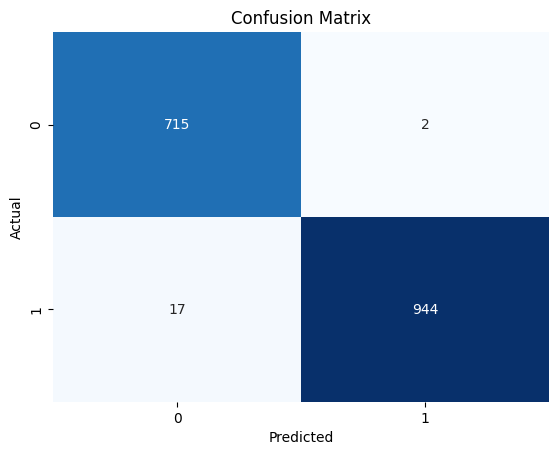

In [76]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### 8.4. ROC-AUC Plot

In [77]:
y_prob = rf_classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

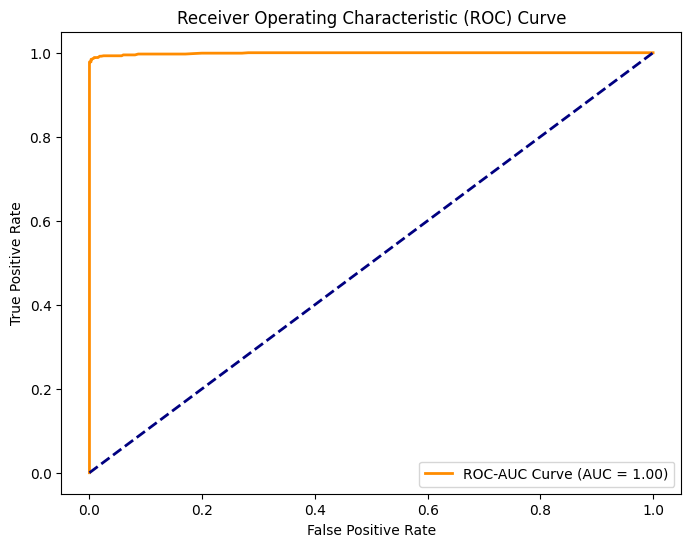

In [78]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC-AUC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### 8.5. Model Interpretation: Feature Importance

In [79]:
feature_importance = rf_classifier.feature_importances_
feature_names = X_train.columns

In [80]:
# Get indices of top 10 features
top_indices = feature_importance.argsort()[-10:][::-1]

# Extract top 10 feature names and importance values
top_feature_names = feature_names[top_indices]
top_feature_importance = feature_importance[top_indices]

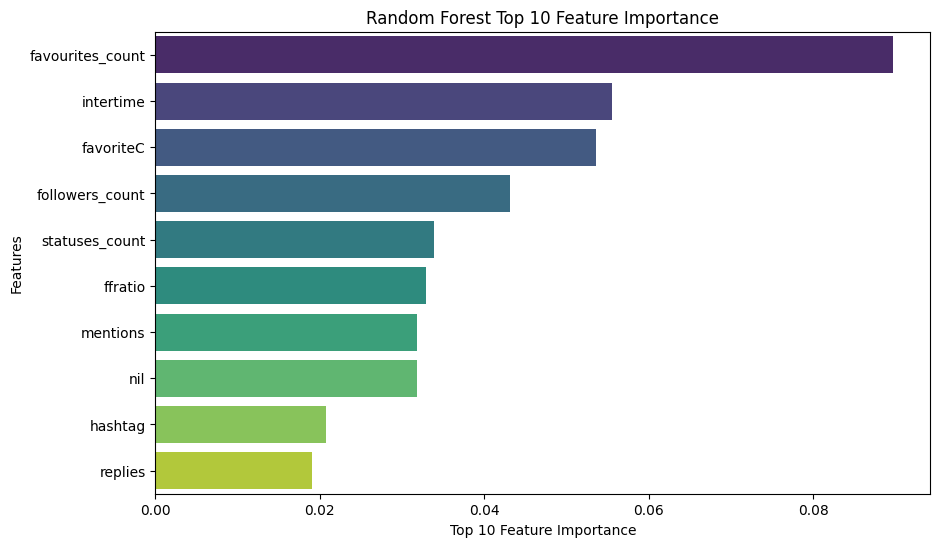

In [81]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_feature_importance, y=top_feature_names, orient='h', palette='viridis')
plt.xlabel('Top 10 Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Top 10 Feature Importance')
plt.show()

# **LSTM**

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

2025-10-24 13:20:04.214966: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761312004.393030      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761312004.437288      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [83]:
# Prepare data for LSTM
lstm_features = [
    'retweets', 'replies', 'favoriteC', 'hashtag', 'url', 
    'mentions', 'intertime', 'ffratio', 'statuses_count', 
    'followers_count', 'friends_count', 'favourites_count', 'listed_count'
]

X_lstm = twitter_df[lstm_features].values
y_lstm = twitter_df['label'].values

# Split the data
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X_lstm, y_lstm, test_size=0.2, random_state=42, stratify=y_lstm
)

# Standardize features
scaler = StandardScaler()
X_train_lstm_scaled = scaler.fit_transform(X_train_lstm)
X_test_lstm_scaled = scaler.transform(X_test_lstm)

# Reshape data for LSTM (samples, timesteps, features)
# Since we don't have temporal data, we'll use 1 timestep with all features
X_train_lstm_reshaped = X_train_lstm_scaled.reshape((X_train_lstm_scaled.shape[0], 1, X_train_lstm_scaled.shape[1]))
X_test_lstm_reshaped = X_test_lstm_scaled.reshape((X_test_lstm_scaled.shape[0], 1, X_test_lstm_scaled.shape[1]))

print(f"LSTM Training data shape: {X_train_lstm_reshaped.shape}")
print(f"LSTM Testing data shape: {X_test_lstm_reshaped.shape}")

LSTM Training data shape: (6708, 1, 13)
LSTM Testing data shape: (1678, 1, 13)


In [84]:
# Build LSTM model
def create_lstm_model(input_shape):
    model = Sequential()
    
    model.add(LSTM(64, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.3))
    
    model.add(LSTM(32, return_sequences=False))
    model.add(Dropout(0.3))
    
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', 'precision', 'recall']
    )
    
    return model

# Create model
lstm_model = create_lstm_model((1, X_train_lstm_reshaped.shape[2]))
lstm_model.summary()

I0000 00:00:1761312045.502614      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 64)          │        19,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,929 (128.63 KB)

 Trainable params: 32,929 (128.63 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
# Train LSTM model
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001
)

history = lstm_model.fit(
    X_train_lstm_reshaped, y_train_lstm,
    batch_size=32,
    epochs=100,
    validation_data=(X_test_lstm_reshaped, y_test_lstm),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/100


I0000 00:00:1761312064.757163     142 cuda_dnn.cc:529] Loaded cuDNN version 90300


210/210 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8287 - loss: 0.5263 - precision: 0.8434 - recall: 0.8664 - val_accuracy: 0.9708 - val_loss: 0.1321 - val_precision: 0.9736 - val_recall: 0.9766 - learning_rate: 0.0010
Epoch 2/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9722 - loss: 0.1030 - precision: 0.9743 - recall: 0.9787 - val_accuracy: 0.9791 - val_loss: 0.0698 - val_precision: 0.9917 - val_recall: 0.9725 - learning_rate: 0.0010
Epoch 3/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9798 - loss: 0.0692 - precision: 0.9873 - recall: 0.9783 - val_accuracy: 0.9797 - val_loss: 0.0688 - val_precision: 0.9938 - val_recall: 0.9715 - learning_rate: 0.0010
Epoch 4/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9817 - loss: 0.0655 - precision: 0.9911 - recall: 0.9774 - val_accuracy: 0.9779 - val_loss: 0.0664 - val_precision: 0.9948 - val_recall: 0.9674 - learning_rate: 0.0010
Epoch 5/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9836

In [86]:
# Evaluate LSTM model
lstm_train_pred_proba = lstm_model.predict(X_train_lstm_reshaped)
lstm_test_pred_proba = lstm_model.predict(X_test_lstm_reshaped)

lstm_train_pred = (lstm_train_pred_proba > 0.5).astype(int).flatten()
lstm_test_pred = (lstm_test_pred_proba > 0.5).astype(int).flatten()

print("LSTM Model Performance:")
print("="*50)
print("Training Results:")
print(f"Accuracy: {accuracy_score(y_train_lstm, lstm_train_pred):.4f}")
print(f"Precision: {precision_score(y_train_lstm, lstm_train_pred):.4f}")
print(f"Recall: {recall_score(y_train_lstm, lstm_train_pred):.4f}")
print(f"F1-Score: {f1_score(y_train_lstm, lstm_train_pred):.4f}")

print("\nTest Results:")
print(f"Accuracy: {accuracy_score(y_test_lstm, lstm_test_pred):.4f}")
print(f"Precision: {precision_score(y_test_lstm, lstm_test_pred):.4f}")
print(f"Recall: {recall_score(y_test_lstm, lstm_test_pred):.4f}")
print(f"F1-Score: {f1_score(y_test_lstm, lstm_test_pred):.4f}")

210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
LSTM Model Performance:
Training Results:
Accuracy: 0.9885
Precision: 0.9964
Recall: 0.9840
F1-Score: 0.9901

Test Results:
Accuracy: 0.9791
Precision: 0.9969
Recall: 0.9674
F1-Score: 0.9819


In [87]:
print(f"F1-Score: {classification_report(y_test_lstm, lstm_test_pred)}")

F1-Score:               precision    recall  f1-score   support

           0       0.96      1.00      0.98       695
           1       1.00      0.97      0.98       983

    accuracy                           0.98      1678
   macro avg       0.98      0.98      0.98      1678
weighted avg       0.98      0.98      0.98      1678



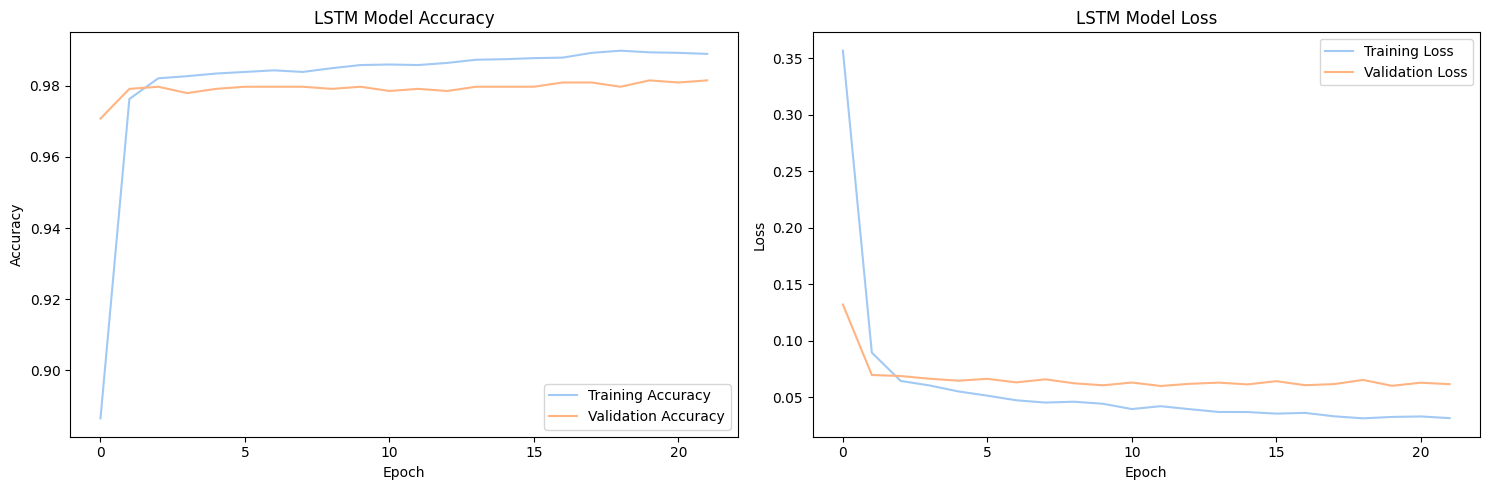

In [88]:
# Plot training history
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

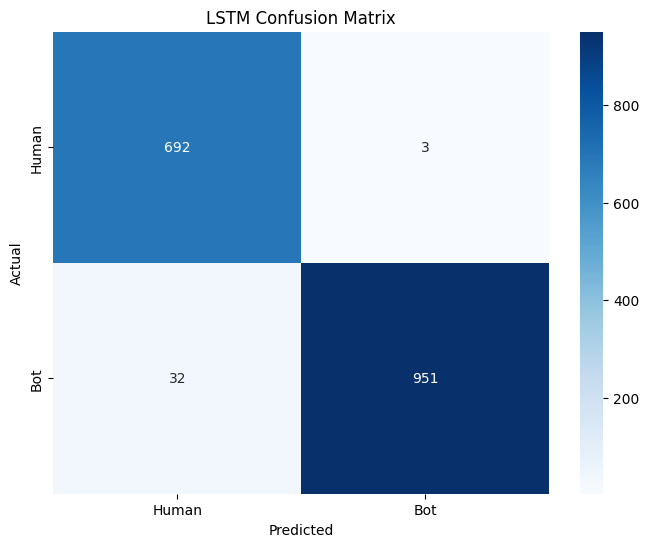

In [89]:
# Confusion Matrix for LSTM
lstm_cm = confusion_matrix(y_test_lstm, lstm_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(lstm_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Human', 'Bot'], 
            yticklabels=['Human', 'Bot'])
plt.title('LSTM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [90]:
# Compare with Random Forest
print("Model Comparison:")
print("="*50)
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

print("\nLSTM Results:")
print(f"Accuracy: {accuracy_score(y_test_lstm, lstm_test_pred):.4f}")
print(f"Precision: {precision_score(y_test_lstm, lstm_test_pred):.4f}")
print(f"Recall: {recall_score(y_test_lstm, lstm_test_pred):.4f}")
print(f"F1-Score: {f1_score(y_test_lstm, lstm_test_pred):.4f}")

Model Comparison:
Random Forest Results:
Accuracy: 0.9887
Precision: 0.9979
Recall: 0.9823
F1-Score: 0.9900

LSTM Results:
Accuracy: 0.9791
Precision: 0.9969
Recall: 0.9674
F1-Score: 0.9819


# **GRU**

In [91]:
from tensorflow.keras.layers import GRU

In [92]:
# Prepare data for GRU (using the same features as LSTM)
X_gru = twitter_df[lstm_features].values
y_gru = twitter_df['label'].values

# Split the data
X_train_gru, X_test_gru, y_train_gru, y_test_gru = train_test_split(
    X_gru, y_gru, test_size=0.2, random_state=42, stratify=y_gru
)

# Standardize features using the same scaler
X_train_gru_scaled = scaler.fit_transform(X_train_gru)
X_test_gru_scaled = scaler.transform(X_test_gru)

# Reshape data for GRU (samples, timesteps, features)
X_train_gru_reshaped = X_train_gru_scaled.reshape((X_train_gru_scaled.shape[0], 1, X_train_gru_scaled.shape[1]))
X_test_gru_reshaped = X_test_gru_scaled.reshape((X_test_gru_scaled.shape[0], 1, X_test_gru_scaled.shape[1]))

print(f"GRU Training data shape: {X_train_gru_reshaped.shape}")
print(f"GRU Testing data shape: {X_test_gru_reshaped.shape}")

GRU Training data shape: (6708, 1, 13)
GRU Testing data shape: (1678, 1, 13)


In [93]:
# Build GRU model
def create_gru_model(input_shape):
    model = Sequential()
    
    # First GRU layer
    model.add(GRU(64, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.3))
    
    # Second GRU layer
    model.add(GRU(32, return_sequences=False))
    model.add(Dropout(0.3))
    
    # Dense layers
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.2))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', 'precision', 'recall']
    )
    
    return model

# Create GRU model
gru_model = create_gru_model((1, X_train_gru_reshaped.shape[2]))
gru_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 1, 64)          │        15,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,121 (98.13 KB)

 Trainable params: 25,121 (98.13 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
# Train GRU model
gru_early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

gru_reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001
)

gru_history = gru_model.fit(
    X_train_gru_reshaped, y_train_gru,
    batch_size=32,
    epochs=100,
    validation_data=(X_test_gru_reshaped, y_test_gru),
    callbacks=[gru_early_stopping, gru_reduce_lr],
    verbose=1
)

Epoch 1/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8355 - loss: 0.4726 - precision: 0.8617 - recall: 0.8572 - val_accuracy: 0.9708 - val_loss: 0.1276 - val_precision: 0.9775 - val_recall: 0.9725 - learning_rate: 0.0010
Epoch 2/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9653 - loss: 0.1223 - precision: 0.9661 - recall: 0.9757 - val_accuracy: 0.9762 - val_loss: 0.0803 - val_precision: 0.9917 - val_recall: 0.9674 - learning_rate: 0.0010
Epoch 3/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9796 - loss: 0.0625 - precision: 0.9860 - recall: 0.9793 - val_accuracy: 0.9762 - val_loss: 0.0725 - val_precision: 0.9958 - val_recall: 0.9634 - learning_rate: 0.0010
Epoch 4/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9836 - loss: 0.0553 - precision: 0.9923 - recall: 0.9797 - val_accuracy: 0.9785 - val_loss: 0.0644 - val_precision: 0.9979 - val_recall: 0.9654 - learning_rate: 0.0010
Epoch 5/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accu

In [95]:
# Evaluate GRU model
gru_train_pred_proba = gru_model.predict(X_train_gru_reshaped)
gru_test_pred_proba = gru_model.predict(X_test_gru_reshaped)

gru_train_pred = (gru_train_pred_proba > 0.5).astype(int).flatten()
gru_test_pred = (gru_test_pred_proba > 0.5).astype(int).flatten()

print("GRU Model Performance:")
print("="*50)
print("Training Results:")
print(f"Accuracy: {accuracy_score(y_train_gru, gru_train_pred):.4f}")
print(f"Precision: {precision_score(y_train_gru, gru_train_pred):.4f}")
print(f"Recall: {recall_score(y_train_gru, gru_train_pred):.4f}")
print(f"F1-Score: {f1_score(y_train_gru, gru_train_pred):.4f}")

print("\nTest Results:")
print(f"Accuracy: {accuracy_score(y_test_gru, gru_test_pred):.4f}")
print(f"Precision: {precision_score(y_test_gru, gru_test_pred):.4f}")
print(f"Recall: {recall_score(y_test_gru, gru_test_pred):.4f}")
print(f"F1-Score: {f1_score(y_test_gru, gru_test_pred):.4f}")

210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
GRU Model Performance:
Training Results:
Accuracy: 0.9905
Precision: 0.9956
Recall: 0.9880
F1-Score: 0.9918

Test Results:
Accuracy: 0.9821
Precision: 0.9969
Recall: 0.9725
F1-Score: 0.9846


In [96]:
print(f"Classification_report: {classification_report(y_test_gru, gru_test_pred)}")

Classification_report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98       695
           1       1.00      0.97      0.98       983

    accuracy                           0.98      1678
   macro avg       0.98      0.98      0.98      1678
weighted avg       0.98      0.98      0.98      1678



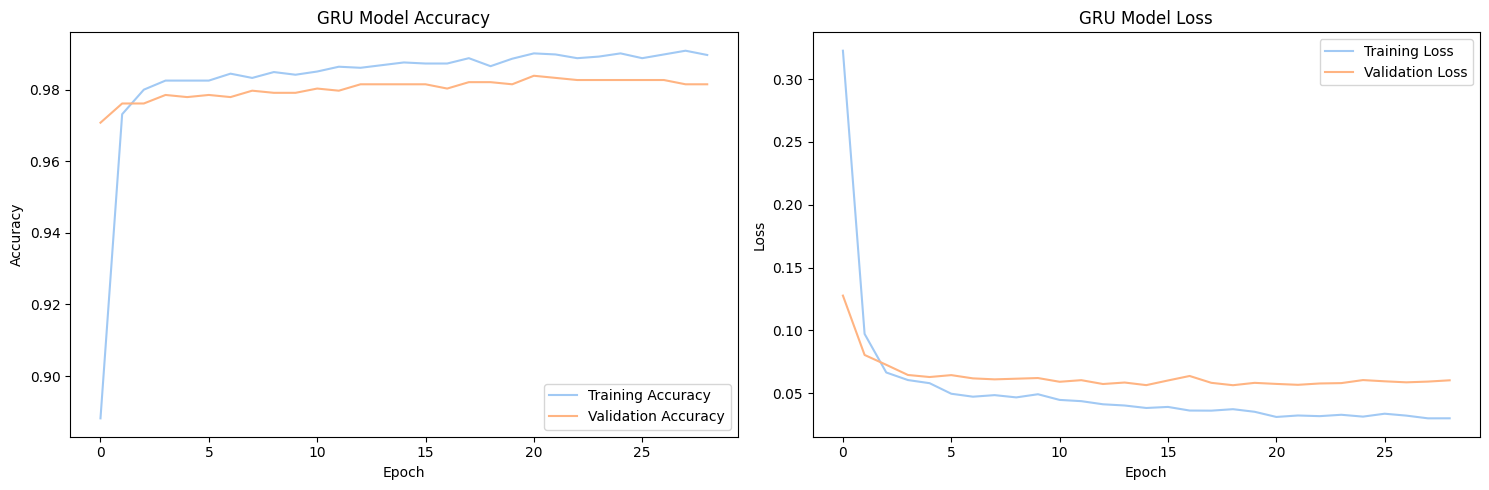

In [97]:
# Plot GRU training history
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(gru_history.history['accuracy'], label='Training Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('GRU Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(gru_history.history['loss'], label='Training Loss')
plt.plot(gru_history.history['val_loss'], label='Validation Loss')
plt.title('GRU Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

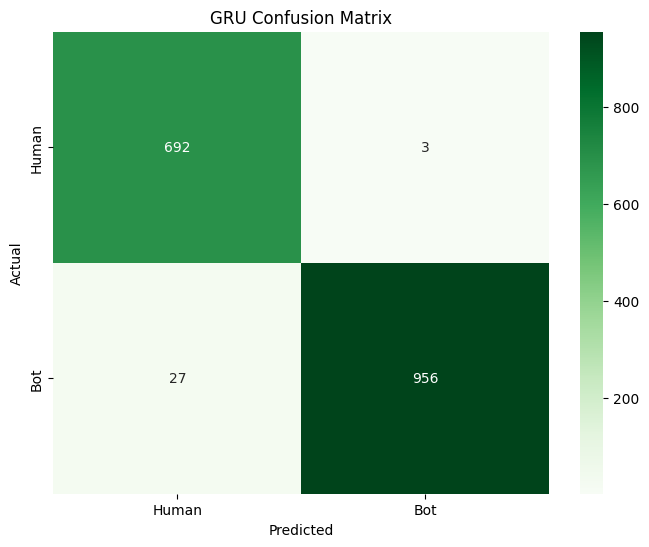

In [98]:
# Confusion Matrix for GRU
gru_cm = confusion_matrix(y_test_gru, gru_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(gru_cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Human', 'Bot'], 
            yticklabels=['Human', 'Bot'])
plt.title('GRU Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [99]:
# Compare all three models
print("Model Comparison:")
print("="*50)
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

print("\nLSTM Results:")
print(f"Accuracy: {accuracy_score(y_test_lstm, lstm_test_pred):.4f}")
print(f"Precision: {precision_score(y_test_lstm, lstm_test_pred):.4f}")
print(f"Recall: {recall_score(y_test_lstm, lstm_test_pred):.4f}")
print(f"F1-Score: {f1_score(y_test_lstm, lstm_test_pred):.4f}")

print("\nGRU Results:")
print(f"Accuracy: {accuracy_score(y_test_gru, gru_test_pred):.4f}")
print(f"Precision: {precision_score(y_test_gru, gru_test_pred):.4f}")
print(f"Recall: {recall_score(y_test_gru, gru_test_pred):.4f}")
print(f"F1-Score: {f1_score(y_test_gru, gru_test_pred):.4f}")

Model Comparison:
Random Forest Results:
Accuracy: 0.9887
Precision: 0.9979
Recall: 0.9823
F1-Score: 0.9900

LSTM Results:
Accuracy: 0.9791
Precision: 0.9969
Recall: 0.9674
F1-Score: 0.9819

GRU Results:
Accuracy: 0.9821
Precision: 0.9969
Recall: 0.9725
F1-Score: 0.9846


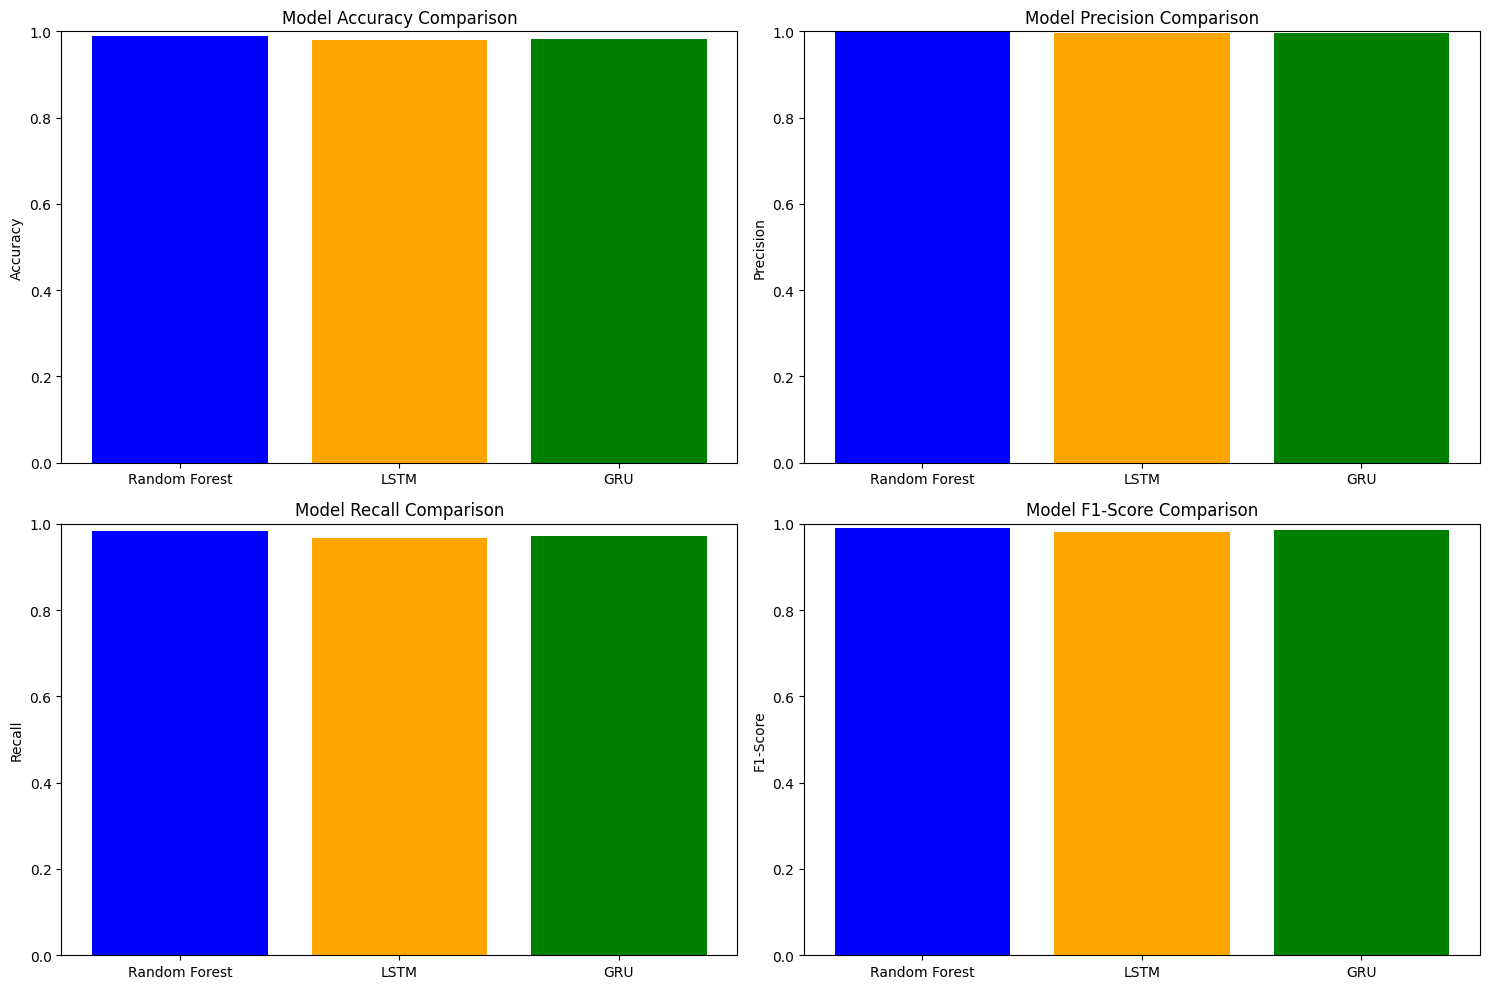

In [100]:
# Visual comparison of all models
models = ['Random Forest', 'LSTM', 'GRU']
accuracy = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test_lstm, lstm_test_pred),
    accuracy_score(y_test_gru, gru_test_pred)
]
precision = [
    precision_score(y_test, y_pred),
    precision_score(y_test_lstm, lstm_test_pred),
    precision_score(y_test_gru, gru_test_pred)
]
recall = [
    recall_score(y_test, y_pred),
    recall_score(y_test_lstm, lstm_test_pred),
    recall_score(y_test_gru, gru_test_pred)
]
f1 = [
    f1_score(y_test, y_pred),
    f1_score(y_test_lstm, lstm_test_pred),
    f1_score(y_test_gru, gru_test_pred)
]

# Create comparison plot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Accuracy
axes[0, 0].bar(models, accuracy, color=['blue', 'orange', 'green'])
axes[0, 0].set_title('Model Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_ylim(0, 1)

# Precision
axes[0, 1].bar(models, precision, color=['blue', 'orange', 'green'])
axes[0, 1].set_title('Model Precision Comparison')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].set_ylim(0, 1)

# Recall
axes[1, 0].bar(models, recall, color=['blue', 'orange', 'green'])
axes[1, 0].set_title('Model Recall Comparison')
axes[1, 0].set_ylabel('Recall')
axes[1, 0].set_ylim(0, 1)

# F1-Score
axes[1, 1].bar(models, f1, color=['blue', 'orange', 'green'])
axes[1, 1].set_title('Model F1-Score Comparison')
axes[1, 1].set_ylabel('F1-Score')
axes[1, 1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

# **BERT**

In [101]:
# !pip install transformers torch datasets

In [126]:
!pip install transformers --upgrade 


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 89.8 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 89.4 MB/s eta 0:00:00:00:01
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.2
    Uninstalling tokenizers-0.21.2:
      Successfully uninstalled tokenizers-0.21.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.49.0
    Uninstalling transformers-4.49.0:
      Successfully uninstalled transformers-4.49.0
